---

# $k$-Means Clustering 

---

## Introduction

K means clustering is an unsupervised learning algorithm that is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

---

## Algorithm

K-means clustering is an unsupervised machine learning algorithm used for partitioning a given dataset into K distinct clusters based on the similarity between the data points. The algorithm aims to minimize the within-cluster sum of squares (WCSS). Here's the derivation of the K-means algorithm:

Let's denote the dataset by $X = {x_1, x_2, ..., x_N}$, where $N$ is the number of data points, and each point $x_i$ is an `M`-dimensional vector. The goal is to partition the dataset into $K$ clusters, denoted by $C_1, C_2, ..., C_K$.

We denote the centroids of these clusters by $μ_1, μ_2, ..., μ_K$. The objective of K-means is to minimize the within-cluster sum of squares (WCSS), which can be defined as:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2
$$

To minimize this objective function, we use an iterative algorithm consisting of two main steps:

1. **Assignment step**: Assign each data point to the nearest centroid:

$$
C_k = \{ x_i : ||x_i - \mu_k|| \leq ||x_i - \mu_j||, \forall j, j \neq k \}
$$

2. **Update step**: Update the centroids by computing the mean of all data points in each cluster:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

The algorithm is initialized by randomly selecting `K` data points as the initial centroids. Then, it iterates between the assignment and update steps until convergence, which is typically achieved when the centroids do not change significantly or the maximum number of iterations is reached.

Here's the K-means algorithm in a step-by-step manner:

1. Initialize centroids $μ_1, μ_2, ..., μ_K$ randomly by selecting $K$ data points from $X$.
2. Repeat until convergence:
   a. **Assignment step**: Assign each data point to the nearest centroid using the equation:

$$
C_k = \{ x_i : ||x_i - \mu_k|| \leq ||x_i - \mu_j||, \forall j, j \neq k \}
$$

   b. **Update step**: Update the centroids by computing the mean of all data points in each cluster:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

This process will continue until the centroids no longer change significantly, or a pre-defined maximum number of iterations is reached.

---

# Illustration

<img src="https://miro.medium.com/v2/resize:fit:1080/0*irrlUXS1tmYanvT0.png" width="400">

---

# Advantages and Disadvantages

## Advantages

- Simple to implement
- Works well with a large number of variables
- Works well when the clusters are globular

## Disadvantages

- Difficult to predict K-Value
- Sensitive to outliers
- Sensitive to initial values
- Difficult to predict while clustering have different size and density

---

# Implementation



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 4, n_features = 2, random_state = 0)

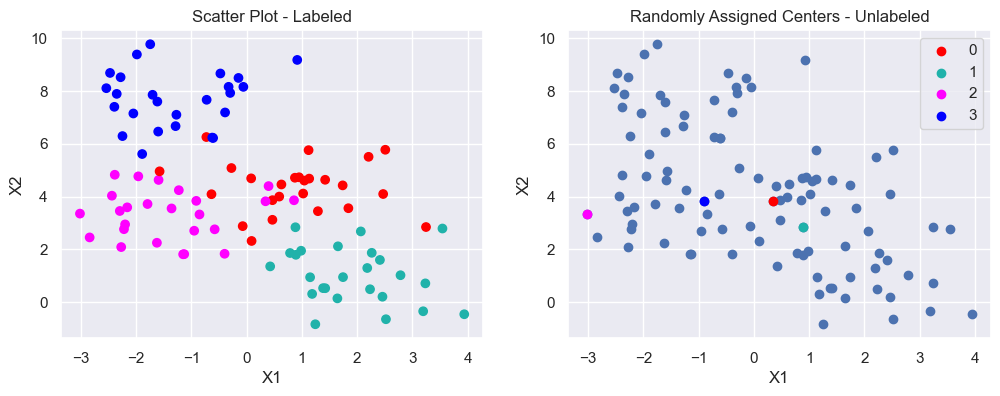

In [37]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    else:
        return "blue"
    
c = [colors(label) for label in y]

#plot two plots side by side
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

#plot the scatter plot
ax[0].scatter(X[:, 0], X[:, 1], color = c)
ax[0].set_xlabel("X1")
ax[0].set_ylabel("X2")
ax[0].set_title("Scatter Plot - Labeled")




# random assign 4 centers
centers = []
for k in range(4):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

#plot the centers on the scatter plot
ax[1].scatter(X[:, 0], X[:, 1])
ax[1].scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax[1].scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax[1].scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
ax[1].scatter([centers[3][0]], [centers[3][1]], color = "blue", label = centers[3][2])
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")
ax[1].set_title("Randomly Assigned Centers - Unlabeled")
ax[1].legend()
plt.show()




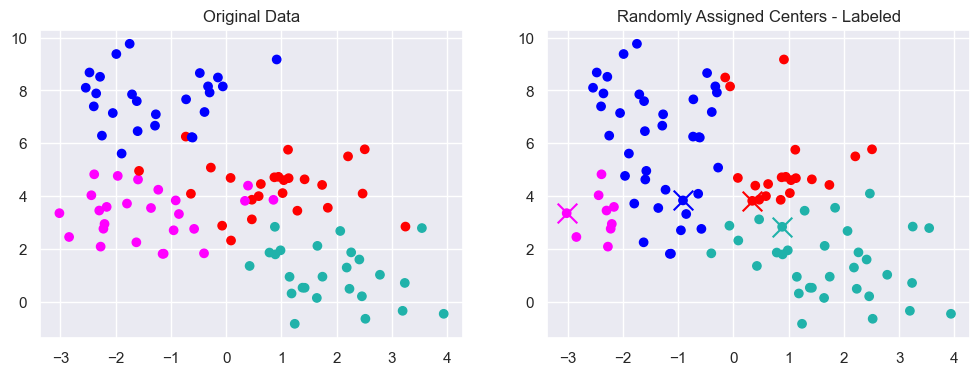

In [38]:
# assign clusters to each center with the help of distance function
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]


current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data")

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2], marker = "x", s = 200)
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2],  marker = "x", s = 200)
ax2.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2],  marker = "x", s = 200)
ax2.scatter([centers[3][0]], [centers[3][1]], color = "blue", label = centers[3][2],  marker = "x", s = 200)
ax2.set_title("Randomly Assigned Centers - Labeled")
plt.show()

In [39]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]  

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

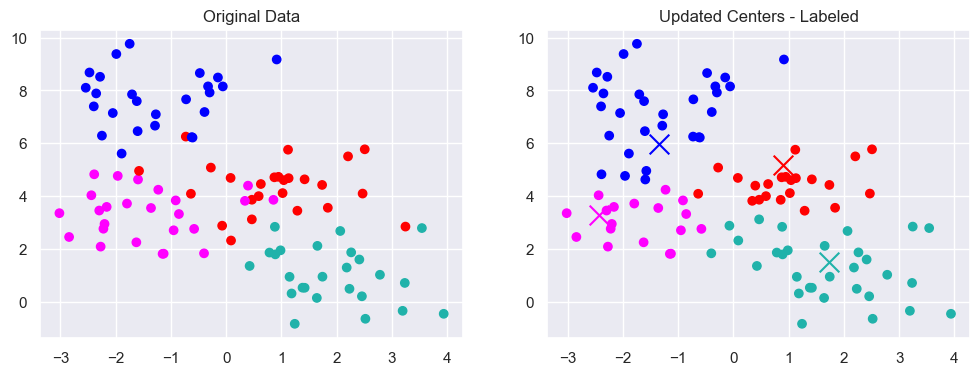

In [40]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data")

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([new_centers[0][0]], [new_centers[0][1]], color = "red", label = centers[0][2], marker = "x", s = 200)
ax2.scatter([new_centers[1][0]], [new_centers[1][1]], color = "lightseagreen", label = centers[1][2],  marker = "x", s = 200)
ax2.scatter([new_centers[2][0]], [new_centers[2][1]], color = "magenta", label = centers[2][2],  marker = "x", s = 200)
ax2.scatter([new_centers[3][0]], [new_centers[3][1]], color = "blue", label = centers[3][2],  marker = "x", s = 200)
ax2.set_title("Updated Centers - Labeled")
plt.show()


In [41]:
# k-means clustering algorithm - defined

def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        current_labels = assign_clusters(X, centers)
        centers = update_centers(X, centers)
        
    return centers 

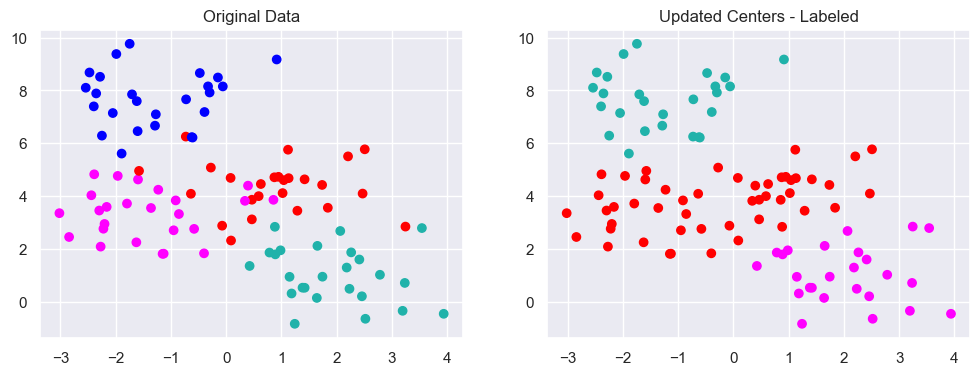

In [43]:
centers = k_means_clustering(X, 3)

centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data")

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("Updated Centers - Labeled")

plt.show()

# Conclusion

K-means clustering is a simple and popular clustering algorithm. It is easy to implement and understand. However, it is not the best choice for all applications. It is sensitive to outliers and does not perform well when clusters have different sizes and densities. It is also difficult to predict the number of clusters in advance.